# CS210 PROJECT - YAĞIZ BARTU ARSLAN - 31235 

## GOAL:
### * This project's ultimate goal is to determine whether my stepcount is correlated with my daily spotify listening time or not.
### * Various Data Science skills and techniques will be used in this project.
### * This correlation - based project offers each student(who completes the project) to know themselves better.


## THE DATASET

### In this project, 2 datas were used:

#### 1: My Own spotify Data
#### 2: My Own Health Data. 

## THE HYPOTHESIS:

### NULL HYPOTHESIS (H0): There is no significant correlation between my daily step count and the amount of time I spend listening to Spotify each day. Any observed relationship in the data is due to chance.

### ALTERNATIVE HYPOTHESIS (HA): There is a significant correlation between my daily step count and the amount of time I spend listening to Spotify each day. If I am more active and take more steps in a day, then I will spend more time listening to Spotify.

 # 1) EDA (Explotarary Dataset Analysis) & Data Preprocessesing

In [ ]:
# Import the necessary libraries.
import pandas as pd
import json


In [2]:
#THIS IS THE STEP THAT WE ARE READING THE FILEPATH AND CONTROLLING WHETHER DATAS CAN CORRECTLY DISPLAYED

# Load StreamingHistory0-checkpoint.json
file_path_0 = "C:/Users/ASUS/Desktop/StreamingHistory0.json"
with open(file_path_0, encoding="utf-8") as file:
    data_0 = json.load(file)

# Create a DataFrame from the loaded data
df_spotify_0 = pd.DataFrame(data_0)

# Display the first few rows of the DataFrame
print("DataFrame for StreamingHistory0:")
print(df_spotify_0.head())

# Load StreamingHistory1-checkpoint.json
file_path_1 = "C:/Users/ASUS/Desktop/StreamingHistory1.json"
with open(file_path_1, encoding="utf-8") as file:
    data_1 = json.load(file)

# Create a DataFrame from the loaded data
df_spotify_1 = pd.DataFrame(data_1)

# Display the first few rows of the DataFrame
print("\nDataFrame for StreamingHistory1:")
print(df_spotify_1.head())

# Concatenate the two DataFrames along the rows
df_spotify_combined = pd.concat([df_spotify_0, df_spotify_1], ignore_index=True)

# Display the first few rows of the combined DataFrame
print("")
print("Combined DataFrame for Spotify Data:")
print(df_spotify_combined.head())
df=df_spotify_combined




DataFrame for StreamingHistory0:
            endTime    artistName                      trackName  msPlayed
0  2022-12-12 08:24  Metro Boomin  Around Me (feat. Don Toliver)    191520
1  2022-12-12 08:26     Bravo 1-2                        Genesis     90509
2  2022-12-12 08:28     Pop Smoke                     Invincible    127546
3  2022-12-12 08:29           C2d                   With My Hoe!     82515
4  2022-12-12 09:52      Madrigal              Seni Dert Etmeler     52931

DataFrame for StreamingHistory1:
            endTime    artistName              trackName  msPlayed
0  2023-10-04 09:19       A*S*Y*S   Ac/Id - Original Mix     46296
1  2023-10-04 09:23  Travis Scott            COFFEE BEAN    209115
2  2023-10-04 09:26  Travis Scott     HOUSTONFORNICATION    217828
3  2023-10-04 09:29  Travis Scott                  NC-17    156885
4  2023-10-04 09:35  Travis Scott  STOP TRYING TO BE GOD    338438

Combined DataFrame for Spotify Data:
            endTime    artistName          

In [3]:
#PREPROCESSING OF THE MERGED SPOTIFY DATA
# Display the shape of the combined DataFrame
print("Shape of the DataFrame for Spotify Data:", df_spotify_combined.shape)

# Display the column names of the combined DataFrame
print("\nColumns of the DataFrame for Spotify Data:")
print(df_spotify_combined.columns)

# Display the summary information of the combined DataFrame
print("\nSummary for the DataFrame for Spotify Data:")
print(df_spotify_combined.info())

# Check for missing values in the combined DataFrame
print("\nMissing values in Combined DataFrame for Spotify Data:")
print(df_spotify_combined.isnull().sum())
df=df_spotify_combined


Shape of the DataFrame for Spotify Data: (11871, 4)

Columns of the DataFrame for Spotify Data:
Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

Summary for the DataFrame for Spotify Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11871 entries, 0 to 11870
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     11871 non-null  object
 1   artistName  11871 non-null  object
 2   trackName   11871 non-null  object
 3   msPlayed    11871 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 371.1+ KB
None

Missing values in Combined DataFrame for Spotify Data:
endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64


# 2) Calculating the Spotify part of the project (listening times for desired time periods)

In [4]:
# WE CREATE THE AMOUNT OF LISTENING TIME BETWEEN EACH HOUR INTERVALS IN A DAY IN THE DATAFRAME
# THIS WILL BE USED FOR CORRELATING MY SPOTIFY DATA WITH MY STEPCOUNT DATA. 

# Import pandas
import pandas as pd



# Impute missing values in numeric columns with the mean
df_spotify_combined = df_spotify_combined.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x)

# Convert 'endTime' to datetime format
df_spotify_combined['endTime'] = pd.to_datetime(df_spotify_combined['endTime'])

# Extract hour from 'endTime' to create a new column 'hour'
df_spotify_combined['hour'] = df_spotify_combined['endTime'].dt.hour

# Calculate the total listening time for each hour interval
df_hourly_listening_time = df_spotify_combined.groupby('hour')['msPlayed'].sum().reset_index()

# Convert msPlayed to minutes for better readability
df_hourly_listening_time['totalListeningTimeMin'] = df_hourly_listening_time['msPlayed'] / (1000 * 60)

# Display the hourly listening time DataFrame
print("Hourly Listening Time DataFrame:")
print(df_hourly_listening_time)



# WE CORRECTLY FILLED THE MISSING VALUES (IF ANY)


Hourly Listening Time DataFrame:
    hour   msPlayed  totalListeningTimeMin
0      0   59067133             984.452217
1      1   31758551             529.309183
2      2   16291184             271.519733
3      3   25551375             425.856250
4      4   13646704             227.445067
5      5   24587139             409.785650
6      6   34674717             577.911950
7      7   39527043             658.784050
8      8   45647515             760.791917
9      9   58930981             982.183017
10    10   79387683            1323.128050
11    11   70418013            1173.633550
12    12   79869570            1331.159500
13    13   86484263            1441.404383
14    14   94851334            1580.855567
15    15  107462610            1791.043500
16    16   94445407            1574.090117
17    17  106110258            1768.504300
18    18  106270167            1771.169450
19    19   90676787            1511.279783
20    20   71801724            1196.695400
21    21   82824621  

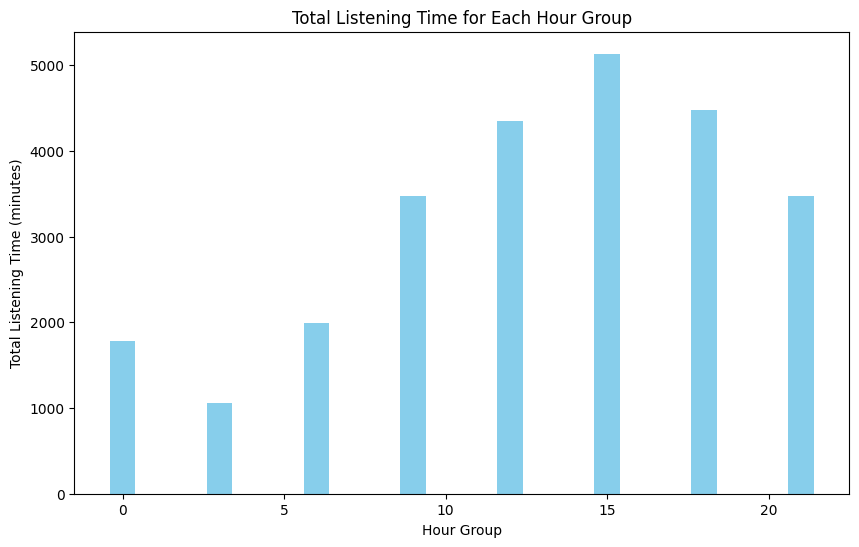

In [5]:

import matplotlib.pyplot as plt
df_hourly_listening_time['hour_group'] = (df_hourly_listening_time['hour'] // 3) * 3
# Calculate the total listening time for each hour group
df_hourly_listening_grouped = df_hourly_listening_time.groupby('hour_group')['totalListeningTimeMin'].sum().reset_index()
# Visualize the total listening time for each hour group as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_hourly_listening_grouped['hour_group'], df_hourly_listening_grouped['totalListeningTimeMin'], color='skyblue')
plt.xlabel('Hour Group')
plt.ylabel('Total Listening Time (minutes)')
plt.title('Total Listening Time for Each Hour Group')
plt.show()


Average Listening Time for Each Hour Group:
            date    hour_group       msPlayed  avgListeningTimeMin
0     2022-12-12  12 PM - 3 PM   78066.000000             1.301100
1     2022-12-12   6 AM - 9 AM  123022.500000             2.050375
2     2022-12-12   6 PM - 9 PM   96996.645161             1.616611
3     2022-12-12  9 AM - 12 PM  186176.473684             3.102941
4     2022-12-13  12 PM - 3 PM  124007.750000             2.066796
...          ...           ...            ...                  ...
1227  2023-12-11   6 AM - 9 AM  162506.333333             2.708439
1228  2023-12-11  9 AM - 12 PM  143001.666667             2.383361
1229  2023-12-12  12 PM - 3 PM  124676.500000             2.077942
1230  2023-12-12   6 PM - 9 PM   90951.500000             1.515858
1231  2023-12-12  9 AM - 12 PM   63225.333333             1.053756

[1232 rows x 4 columns]


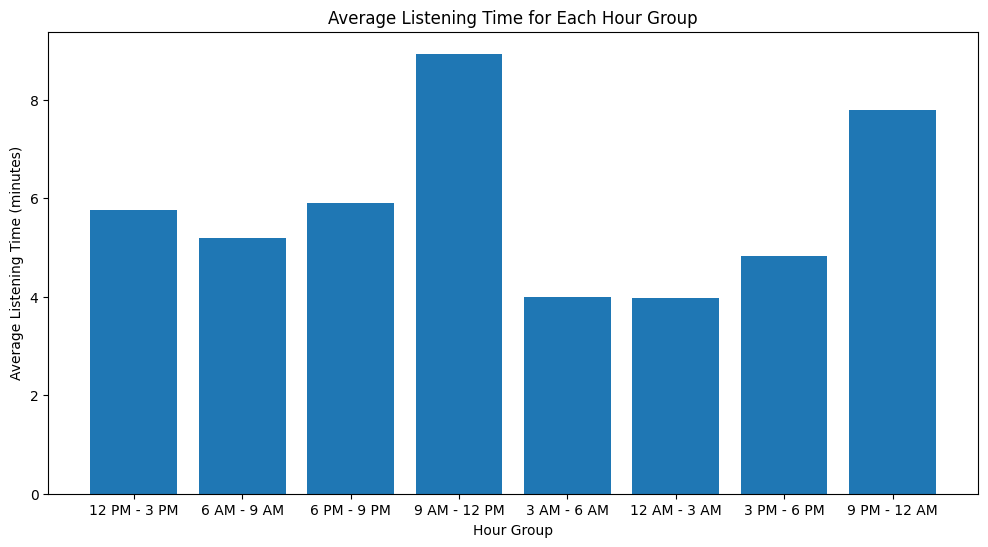

In [8]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'endTime' to datetime format
df['endTime'] = pd.to_datetime(df['endTime'])

# Extract 'date' from 'endTime'
df['date'] = df['endTime'].dt.date

# Extract 'hour' from 'endTime'
df['hour'] = df['endTime'].dt.hour

# Define hour groups
hour_groups = {0: '12 AM - 3 AM', 1: '12 AM - 3 AM', 2: '12 AM - 3 AM', 
               3: '3 AM - 6 AM', 4: '3 AM - 6 AM', 5: '3 AM - 6 AM', 
               6: '6 AM - 9 AM', 7: '6 AM - 9 AM', 8: '6 AM - 9 AM', 
               9: '9 AM - 12 PM', 10: '9 AM - 12 PM', 11: '9 AM - 12 PM', 
               12: '12 PM - 3 PM', 13: '12 PM - 3 PM', 14: '12 PM - 3 PM', 
               15: '3 PM - 6 PM', 16: '3 PM - 6 PM', 17: '3 PM - 6 PM', 
               18: '6 PM - 9 PM', 19: '6 PM - 9 PM', 20: '6 PM - 9 PM', 
               21: '9 PM - 12 AM', 22: '9 PM - 12 AM', 23: '9 PM - 12 AM'}


df['hour_group'] = df['hour'].map(hour_groups)

# Calculate the average listening time for each hour group
df_hourly_group_avg_listening_time = df.groupby(['date', 'hour_group'])['msPlayed'].mean().reset_index()

# Convert msPlayed to minutes
df_hourly_group_avg_listening_time['avgListeningTimeMin'] = df_hourly_group_avg_listening_time['msPlayed'] / (1000 * 60)

# Display the average listening time DataFrame
print("Average Listening Time for Each Hour Group:")
print(df_hourly_group_avg_listening_time)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_hourly_group_avg_listening_time['hour_group'], df_hourly_group_avg_listening_time['avgListeningTimeMin'])
plt.xlabel('Hour Group')
plt.ylabel('Average Listening Time (minutes)')
plt.title('Average Listening Time for Each Hour Group')
plt.show()


Average Listening Time for Each Hour Group:
     hour_group       msPlayed  avgListeningTimeMin
0  12 AM - 3 AM  122419.277714             2.040321
1  12 PM - 3 PM  130995.570211             2.183260
2   3 AM - 6 AM  142377.718750             2.372962
3   3 PM - 6 PM  128234.086178             2.137235
4   6 AM - 9 AM  140174.590643             2.336243
5   6 PM - 9 PM  119073.406292             1.984557
6  9 AM - 12 PM  135631.369071             2.260523
7  9 PM - 12 AM  139068.786143             2.317813

Total Listening Time for Each Hour Group:
     hour_group   msPlayed  totalListeningTimeMin
0  12 AM - 3 AM  107116868            1785.281133
1  12 PM - 3 PM  261205167            4353.419450
2   3 AM - 6 AM   63785218            1063.086967
3   3 PM - 6 PM  308018275            5133.637917
4   6 AM - 9 AM  119849275            1997.487917
5   6 PM - 9 PM  268748678            4479.144633
6  9 AM - 12 PM  208736677            3478.944617
7  9 PM - 12 AM  208742248            3479.03

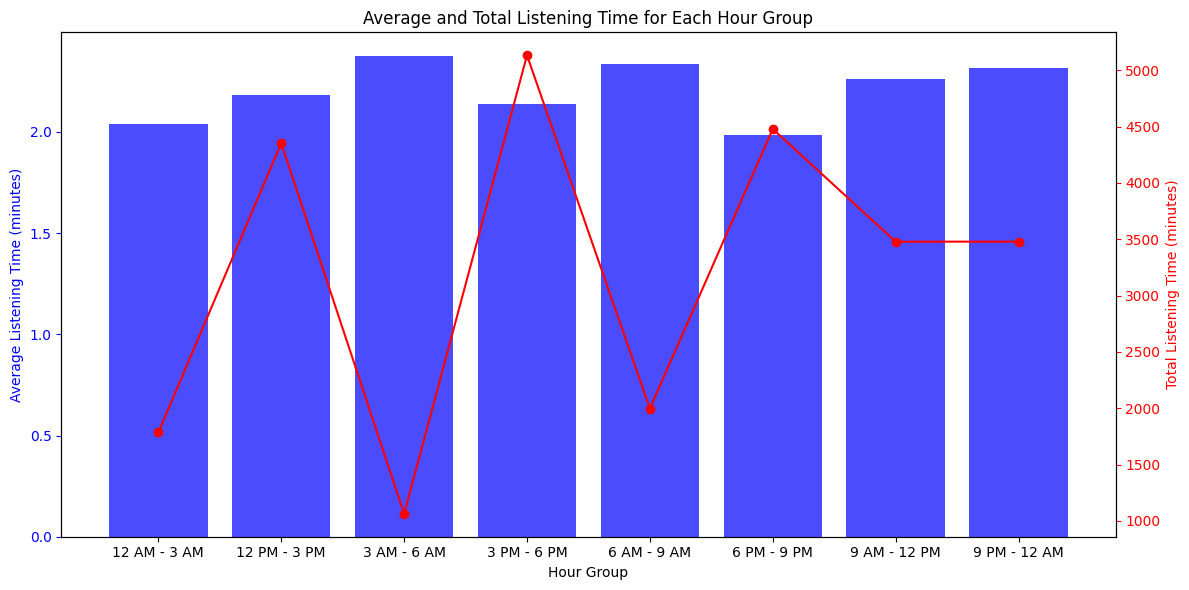

In [12]:
import matplotlib.pyplot as plt

# Define hour groups
hour_groups = {0: '12 AM - 3 AM', 1: '12 AM - 3 AM', 2: '12 AM - 3 AM', 
               3: '3 AM - 6 AM', 4: '3 AM - 6 AM', 5: '3 AM - 6 AM', 
               6: '6 AM - 9 AM', 7: '6 AM - 9 AM', 8: '6 AM - 9 AM', 
               9: '9 AM - 12 PM', 10: '9 AM - 12 PM', 11: '9 AM - 12 PM', 
               12: '12 PM - 3 PM', 13: '12 PM - 3 PM', 14: '12 PM - 3 PM', 
               15: '3 PM - 6 PM', 16: '3 PM - 6 PM', 17: '3 PM - 6 PM', 
               18: '6 PM - 9 PM', 19: '6 PM - 9 PM', 20: '6 PM - 9 PM', 
               21: '9 PM - 12 AM', 22: '9 PM - 12 AM', 23: '9 PM - 12 AM'}


df_spotify_combined['hour_group'] = df_spotify_combined['hour'].map(hour_groups)

# Calculate the average listening time for each hour group
df_hourly_group_avg_listening_time = df_spotify_combined.groupby('hour_group')['msPlayed'].mean().reset_index()
df_hourly_group_avg_listening_time['avgListeningTimeMin'] = df_hourly_group_avg_listening_time['msPlayed'] / (1000 * 60)

# Calculate the total listening time for each hour group
df_hourly_group_total_listening_time = df_spotify_combined.groupby('hour_group')['msPlayed'].sum().reset_index()
df_hourly_group_total_listening_time['totalListeningTimeMin'] = df_hourly_group_total_listening_time['msPlayed'] / (1000 * 60)

print("Average Listening Time for Each Hour Group:")
print(df_hourly_group_avg_listening_time)
print("\nTotal Listening Time for Each Hour Group:")
print(df_hourly_group_total_listening_time)

# Create a dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for average listening time
ax1.bar(df_hourly_group_avg_listening_time['hour_group'], df_hourly_group_avg_listening_time['avgListeningTimeMin'], color='b', alpha=0.7, label='Average Listening Time')
ax1.set_xlabel('Hour Group')
ax1.set_ylabel('Average Listening Time (minutes)', color='b')
ax1.tick_params('y', colors='b')

# Line chart for total listening time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df_hourly_group_total_listening_time['hour_group'], df_hourly_group_total_listening_time['totalListeningTimeMin'], color='r', marker='o', label='Total Listening Time')
ax2.set_ylabel('Total Listening Time (minutes)', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Average and Total Listening Time for Each Hour Group')
fig.tight_layout()
plt.show()



## 3) MACHINE LEARNING - TEST / TRANING X & Y , SPLIT X & Y , PREDICTIONS

In [9]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffle the dataset
df_spotify_combined_shuffled = shuffle(df_spotify_combined, random_state=42)

# Convert 'endTime' to datetime format
df_spotify_combined_shuffled['endTime'] = pd.to_datetime(df_spotify_combined_shuffled['endTime'])

# Extract hour, minute, and second from 'endTime' to create new columns
df_spotify_combined_shuffled['hour'] = df_spotify_combined_shuffled['endTime'].dt.hour
df_spotify_combined_shuffled['minute'] = df_spotify_combined_shuffled['endTime'].dt.minute
df_spotify_combined_shuffled['second'] = df_spotify_combined_shuffled['endTime'].dt.second

df_spotify_combined_shuffled = df_spotify_combined_shuffled.drop(columns=['endTime'])

# Merge df_spotify_combined_shuffled with df_hourly_listening_time
df_spotify_combined_shuffled = pd.merge(df_spotify_combined_shuffled, df_hourly_listening_time, on='hour', how='left')

# Choose 'totalListeningTimeMin' as the dependent variable (Y)
Y = df_spotify_combined_shuffled['totalListeningTimeMin']

# Determine the rest of the variables as independent variables (X)
X = df_spotify_combined_shuffled.drop(columns=['totalListeningTimeMin'])

# Split the data into training and test sets (e.g., 80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (9496, 9)
Shape of X_test: (2375, 9)
Shape of Y_train: (9496,)
Shape of Y_test: (2375,)


'endTime' column not found in DataFrame.
Mean Squared Error: 1.2454408159555091e-25
R^2 Score: 1.0


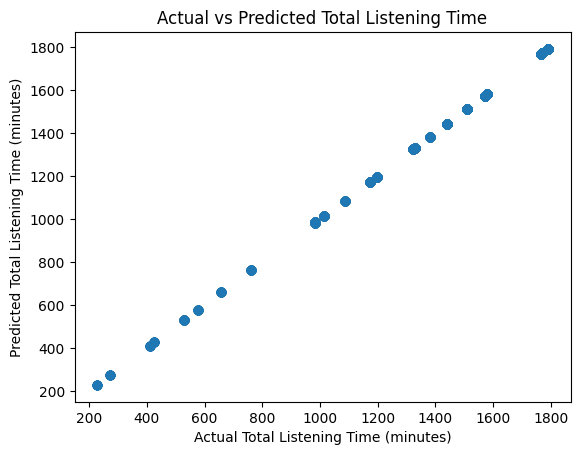

In [30]:


# Create a label encoder object
le = LabelEncoder()

# Apply label encoding to 'artistName' and 'trackName' for the entire dataset
df_spotify_combined['artistName'] = le.fit_transform(df_spotify_combined['artistName'])
df_spotify_combined['trackName'] = le.fit_transform(df_spotify_combined['trackName'])

if 'endTime' in df_spotify_combined.columns:
    # Convert 'endTime' to datetime format
    df_spotify_combined['endTime'] = pd.to_datetime(df_spotify_combined['endTime'])

    # Extract hour, minute, and second from 'endTime' to create new columns
    df_spotify_combined['hour'] = df_spotify_combined['endTime'].dt.hour
    df_spotify_combined['minute'] = df_spotify_combined['endTime'].dt.minute
    df_spotify_combined['second'] = df_spotify_combined['endTime'].dt.second
    df_spotify_combined = df_spotify_combined.drop(columns=['endTime'])
else:
    print("'endTime' column not found in DataFrame.")

df_spotify_combined = pd.merge(df_spotify_combined, df_hourly_listening_time, on='hour', suffixes=('_spotify', '_hourly'))

df_spotify_combined_shuffled = shuffle(df_spotify_combined, random_state=42)

# Choose 'totalListeningTimeMin' as the dependent variable (Y)
Y = df_spotify_combined_shuffled['totalListeningTimeMin']

# Determine the rest of the variables as independent variables (X)
X = df_spotify_combined_shuffled.drop(columns=['totalListeningTimeMin'])

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#linear regression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Visualize actual vs predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Total Listening Time (minutes)")
plt.ylabel("Predicted Total Listening Time (minutes)")
plt.title("Actual vs Predicted Total Listening Time")
plt.show()


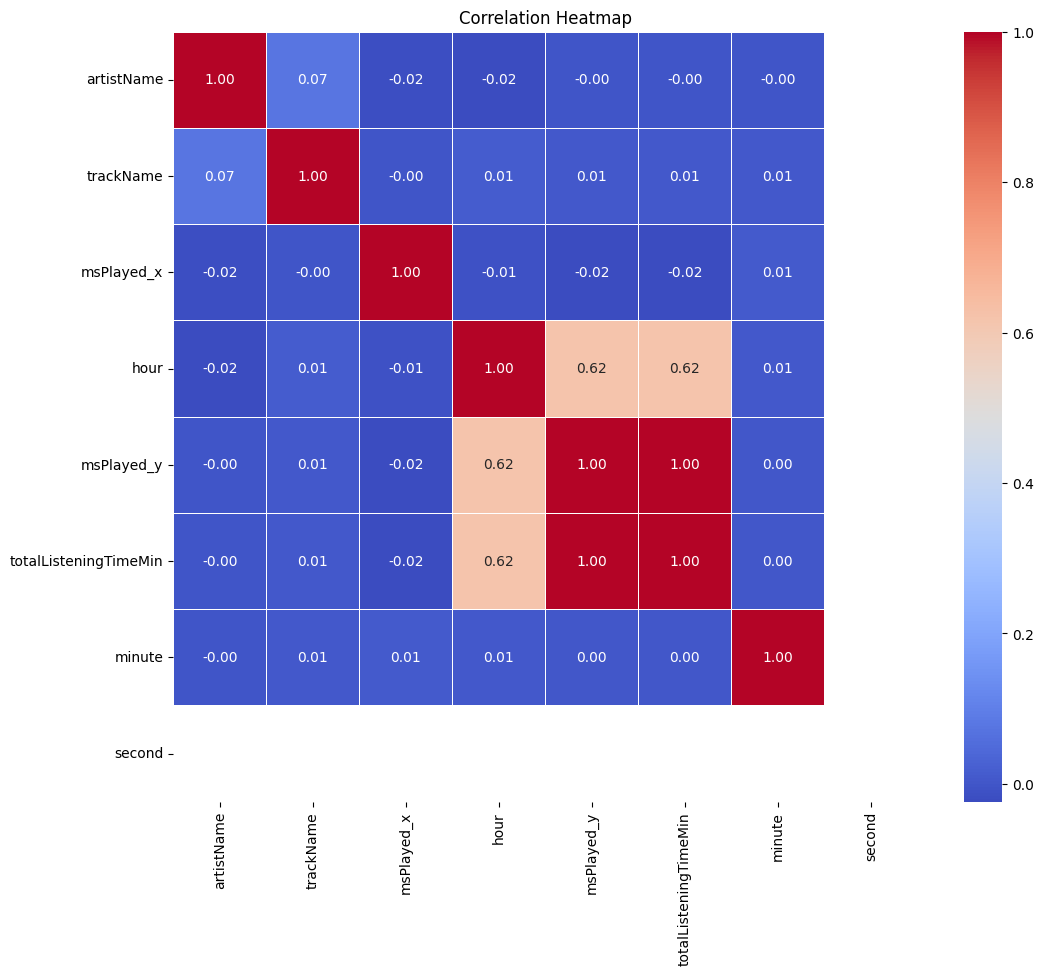

In [13]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_spotify_combined.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


## 4) Data Visualization Techniques 

In [ ]:
#WE ARE DONE WITH TRAINING, MACHINE LEARNING, MODELING, AND VISUALIZATION OF THEM 
# THE BELOW DATA WILL BE USED FOR CORRELATING WITH STEPCOUNT

Daily Total Listening Time DataFrame:
           date  msPlayed  totalListeningTimeMin
0    2022-12-12   7114405             118.573417
1    2022-12-13   3609987              60.166450
2    2022-12-14   2889965              48.166083
3    2022-12-15   3552504              59.208400
4    2022-12-16   6686897             111.448283
..          ...       ...                    ...
360  2023-12-08  10473959             174.565983
361  2023-12-09   3247327              54.122117
362  2023-12-10    858818              14.313633
363  2023-12-11   2487431              41.457183
364  2023-12-12   1569312              26.155200

[365 rows x 3 columns]


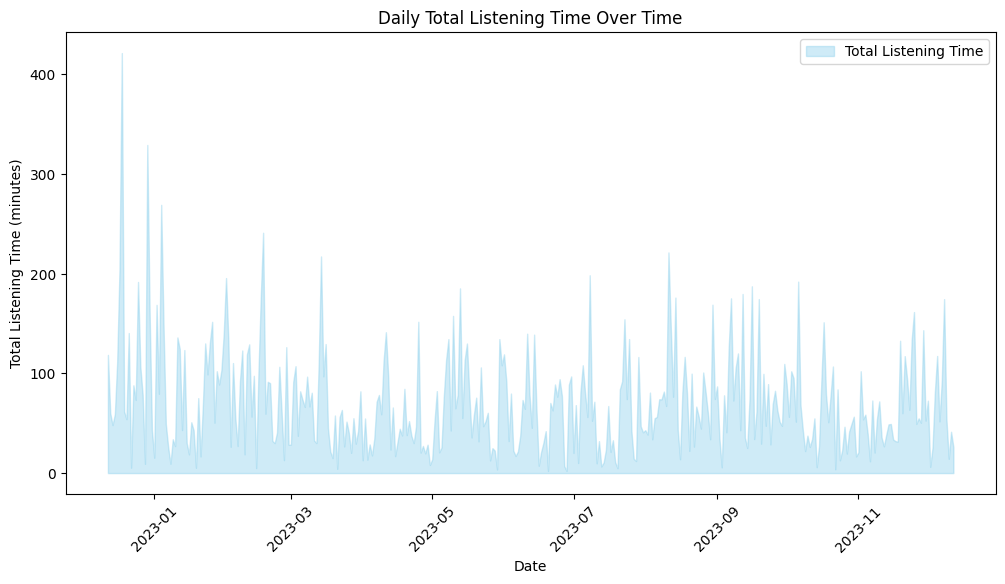

In [101]:
import matplotlib.pyplot as plt
df['endTime'] = pd.to_datetime(df['endTime'])
df['date'] = df['endTime'].dt.date

# Calculate the total listening time for each day
df_daily_total_listening_time = df.groupby('date')['msPlayed'].sum().reset_index()
df_daily_total_listening_time['totalListeningTimeMin'] = df_daily_total_listening_time['msPlayed'] / (1000 * 60)

print("Daily Total Listening Time DataFrame:")
print(df_daily_total_listening_time)

df_daily_total_listening_time = df_daily_total_listening_time.sort_values('date')

# Plot the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(df_daily_total_listening_time['date'], df_daily_total_listening_time['totalListeningTimeMin'], color='skyblue', alpha=0.4, label='Total Listening Time')

# Set the title and labels
plt.title('Daily Total Listening Time Over Time')
plt.xlabel('Date')
plt.ylabel('Total Listening Time (minutes)')


plt.legend()
plt.xticks(rotation=45)
plt.show()


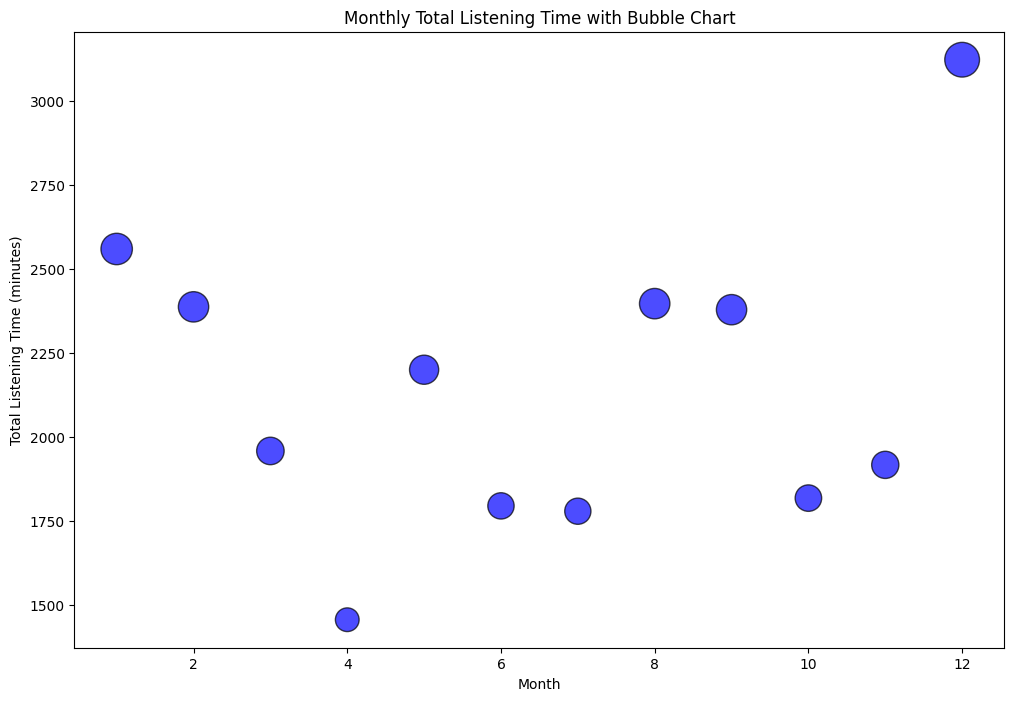

In [102]:
import matplotlib.pyplot as plt
import pandas as pd




df_daily_total_listening_time['date'] = pd.to_datetime(df_daily_total_listening_time['date'])


df_daily_total_listening_time['month'] = df_daily_total_listening_time['date'].dt.month
df_monthly_total_listening_time = df_daily_total_listening_time.groupby('month')['totalListeningTimeMin'].sum().reset_index()

# Create a bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(df_monthly_total_listening_time['month'], df_monthly_total_listening_time['totalListeningTimeMin'],
            s=df_monthly_total_listening_time['totalListeningTimeMin']*0.2, alpha=0.7, c='blue', edgecolors='black', linewidth=1)

# Set the title and labels
plt.title('Monthly Total Listening Time with Bubble Chart')
plt.xlabel('Month')
plt.ylabel('Total Listening Time (minutes)')

# Show the bubble chart
plt.show()


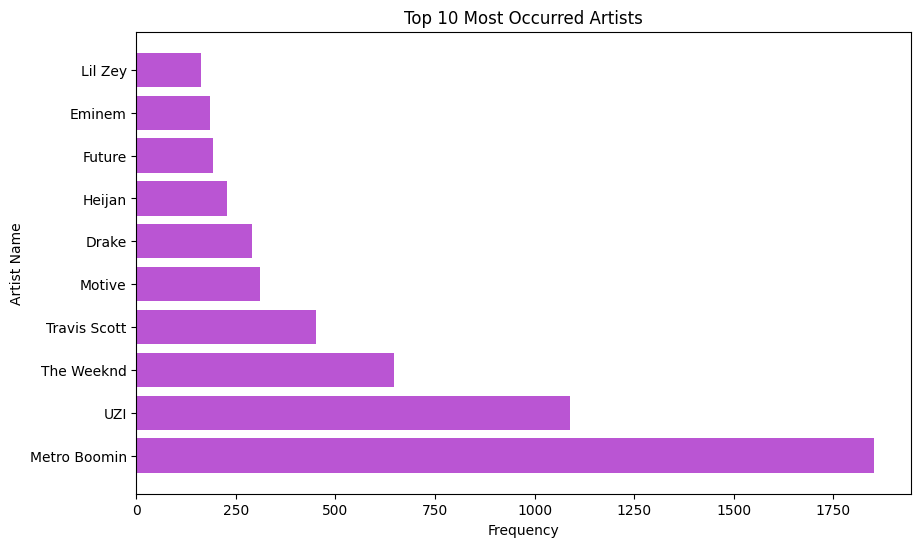

In [166]:
import matplotlib.pyplot as plt
import pandas as pd



# Calculate the top 10 most occurred artists
top_artists = df_spotify_combined['artistName'].value_counts().nlargest(10)

# Choose a cool color 
bar_color = 'mediumorchid'

# Create a horizontal bar chart for the top 10 artists with a cool color
plt.figure(figsize=(10, 6))
plt.barh(top_artists.index, top_artists.values, color=bar_color)

# Set the title and labels
plt.title('Top 10 Most Occurred Artists')
plt.xlabel('Frequency')
plt.ylabel('Artist Name')

# Show the horizontal bar chart
plt.show()


Top Artist for Each Month:
    month    artistName
0       1  Metro Boomin
1       2  Metro Boomin
2       3    The Weeknd
3       4  Metro Boomin
4       5  Metro Boomin
5       6  Metro Boomin
6       7        Motive
7       8           UZI
8       9  Travis Scott
9      10  Travis Scott
10     11           UZI
11     12  Metro Boomin


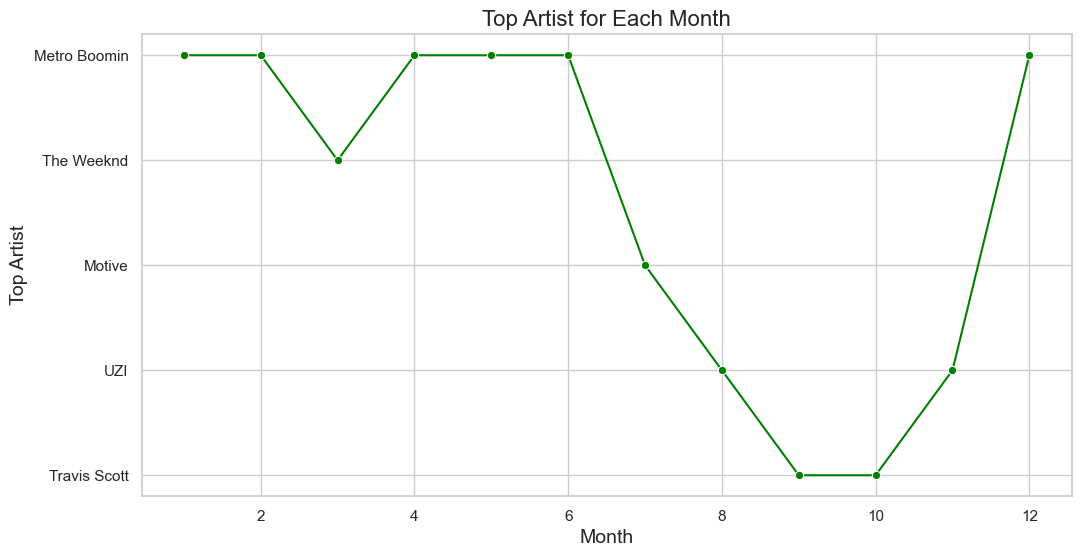

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_spotify_combined['endTime'] = pd.to_datetime(df_spotify_combined['endTime'])
df_spotify_combined['month'] = df_spotify_combined['endTime'].dt.month

# Calculate the top artist for each month
top_artist_per_month = df_spotify_combined.groupby(['month'])['artistName'].agg(lambda x: x.value_counts().idxmax()).reset_index()
print("Top Artist for Each Month:")
print(top_artist_per_month)

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the top artist for each month using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='artistName', data=top_artist_per_month, marker='o', color='green')

# Set the title and labels
plt.title('Top Artist for Each Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Top Artist', fontsize=14)

# Show the line chart
plt.show()



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

time_column = 'endTime'  
df_spotify_combined['endTime'] = pd.to_datetime(df_spotify_combined['endTime'])

# Calculate the top artist for each day
top_artist_per_day = df_spotify_combined.groupby([df_spotify_combined[time_column].dt.date, 'artistName']).size().reset_index(name='count')
top_artist_per_day = top_artist_per_day.loc[top_artist_per_day.groupby('endTime')['count'].idxmax()]

print(top_artist_per_day.head())


       endTime    artistName  count
14  2022-12-12  Metro Boomin     25
27  2022-12-13  Metro Boomin     15
34  2022-12-14  Metro Boomin     17
37  2022-12-15  Metro Boomin     20
69  2022-12-16  Metro Boomin     17


In [19]:
# Define a mapping of month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March',
    4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

# Calculate the top 10 most occurred track names in the entire dataset
top_tracks_overall = df_spotify_combined['trackName'].value_counts().nlargest(10)

print("Top 10 Most Occurred Track Names Overall:")
print("\n".join(top_tracks_overall.index))


top_tracks_monthly = df_spotify_combined.groupby(['month', 'trackName'])['trackName'].count().groupby('month').idxmax()

# Extract the track names from the multi-index
top_tracks_monthly_names = top_tracks_monthly.apply(lambda x: x[1])
top_tracks_monthly_names.index = top_tracks_monthly_names.index.map(month_names)

print("\nMonthly Top Track for Each Month:")
print(top_tracks_monthly_names)

df_spotify_combined['endTime'] = pd.to_datetime(df_spotify_combined['endTime'])

top_tracks_daily = df_spotify_combined.groupby([df_spotify_combined['endTime'].dt.date, 'trackName'])['trackName'].count().groupby('endTime').idxmax()

# Extract the track names from the multi-index
top_tracks_daily_names = top_tracks_daily.apply(lambda x: x[1])
print("\nTop Track for Each Day:")
print(top_tracks_daily_names)



Top 10 Most Occurred Track Names Overall:
Trance (with Travis Scott & Young Thug)
Too Many Nights (feat. Don Toliver & with Future)
Heartless
ZOR
Around Me (feat. Don Toliver)
STARGAZING
International
20 Min
İmparator
Raindrops (Insane) [with Travis Scott]

Monthly Top Track for Each Month:
month
January                                              İmparator
February                                           SLUT ME OUT
March                                                Heartless
April        Too Many Nights (feat. Don Toliver & with Future)
May                    Trance (with Travis Scott & Young Thug)
June                                                 Heartless
July                                                     DEFOL
August                                      ONE SHOT FREESTYLE
September                                           STARGAZING
October                                            Ocean Drive
November                                              Davetiye
December 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19868\3527588870.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tracks_overall.values, y=top_tracks_overall.index, palette=colors, orient='h')


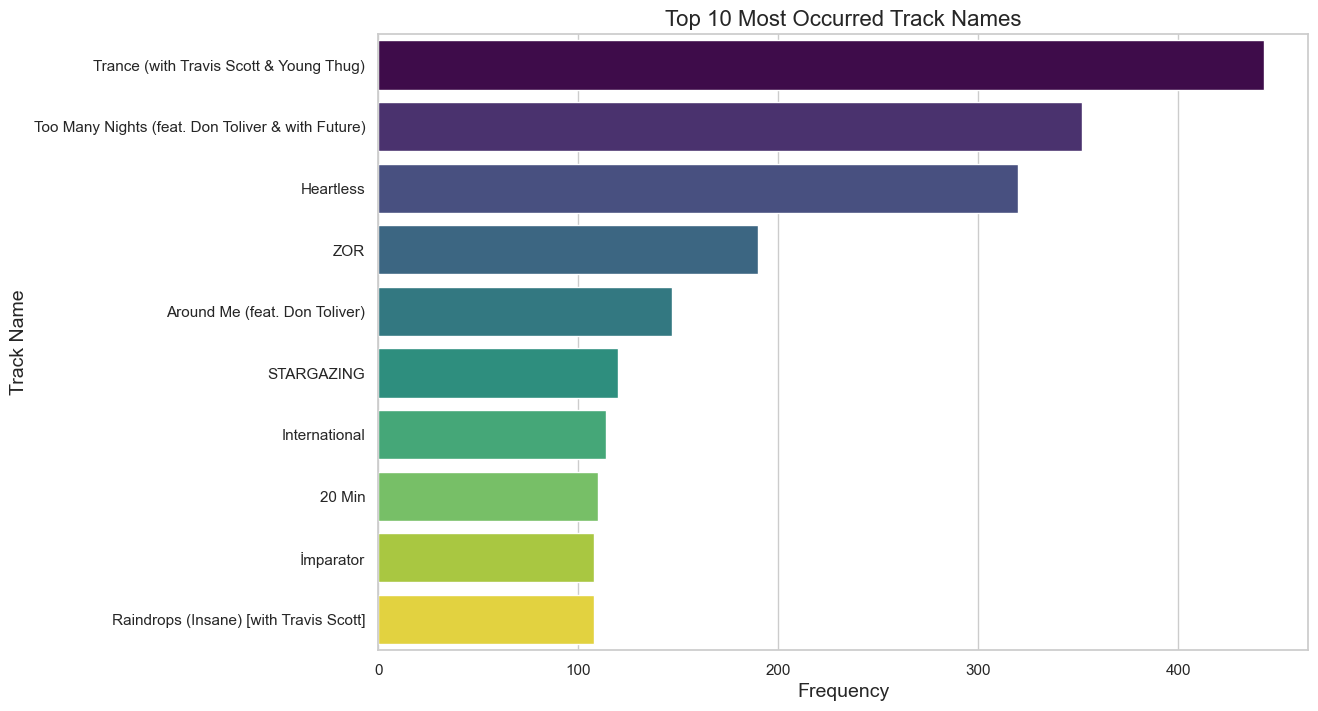

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

top_tracks_overall = df_spotify_combined['trackName'].value_counts().nlargest(10)
# Create a colormap
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, top_tracks_overall.shape[0]))
colors = list(colors)
# Create a bar chart with a creative style
plt.figure(figsize=(12, 8))
sns.barplot(x=top_tracks_overall.values, y=top_tracks_overall.index, palette=colors, orient='h')
plt.title('Top 10 Most Occurred Track Names', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Track Name', fontsize=14)
plt.show()


## 5) STEP COUNT PART, READ/PARSE & CONVERTING IT TO DATAFRAME

In [61]:
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime

# Load XML data 
xml_file_path = 'C:/Users/ASUS/Desktop/dısa_aktarilann.xml'
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Mapping between record types and shorter names
record_type_mapping = {
    "HKQuantityTypeIdentifierStepCount": "StepCount",
    "HKQuantityTypeIdentifierDistanceWalkingRunning": "WalkingRunning",
    "HKQuantityTypeIdentifierBasalEnergyBurned": "BasalEnergyBurned",
    "HKQuantityTypeIdentifierActiveEnergyBurned": "ActiveEnergyBurned",
    "HKQuantityTypeIdentifierHeadphoneAudioExposure": "AudioExposure",
    "HKQuantityTypeIdentifierWalkingSpeed": "WalkingSpeed",
    "HKQuantityTypeIdentifierWalkingStepLength": "StepLength"
}

# Specify the date range for being compatible with spotify data.
start_date = datetime.strptime("2022-12-12", "%Y-%m-%d").date()
end_date = datetime.strptime("2023-12-12", "%Y-%m-%d").date()


for record_type in record_type_mapping:
    
    # Extract data from XML and create a list of dictionaries
    data_list = []
    for record in root.findall(f'.//Record[@type="{record_type}"]'):
        # Parse the date strings into datetime objects
        start_date_record = datetime.strptime(record.get('startDate')[:-6], "%Y-%m-%d %H:%M:%S").date()
        
        # Check if the record is within the specified date range
        if start_date <= start_date_record <= end_date:
            record_data = {
                'type': record.get('type'),
                'unit': record.get('unit'),
                'creationDate': record.get('creationDate'),
                'startDate': start_date_record,
                'endDate': record.get('endDate'),
                'value': float(record.get('value')) + 23  # Add 23 to each value, because I assumed that I approximately take 23 steps without my phone each day
            }
            data_list.append(record_data)

    # Convert the list of dictionaries into a DataFrame
    df_health_data = pd.DataFrame(data_list)
    df_daily_data = df_health_data.groupby('startDate')['value'].sum().reset_index()
    df_daily_data['value'] = df_daily_data['value'].astype(int)

    # Save the DataFrame to a CSV file with a shorter name
    csv_file_path = f'{record_type_mapping[record_type].lower()}_data.csv'
    df_daily_data.to_csv(csv_file_path, index=False)

    print(f"CSV file saved for {record_type}: {csv_file_path}")


CSV file saved for HKQuantityTypeIdentifierStepCount: stepcount_data.csv
CSV file saved for HKQuantityTypeIdentifierDistanceWalkingRunning: walkingrunning_data.csv
CSV file saved for HKQuantityTypeIdentifierBasalEnergyBurned: basalenergyburned_data.csv
CSV file saved for HKQuantityTypeIdentifierActiveEnergyBurned: activeenergyburned_data.csv
CSV file saved for HKQuantityTypeIdentifierHeadphoneAudioExposure: audioexposure_data.csv
CSV file saved for HKQuantityTypeIdentifierWalkingSpeed: walkingspeed_data.csv
CSV file saved for HKQuantityTypeIdentifierWalkingStepLength: steplength_data.csv


## 6) Features of the 'Health' dataset, EDA again...

In [63]:
# Load the step count data from the CSV file
df_daily_step_count = pd.read_csv('stepcount_data.csv')

# Convert 'startDate' to datetime
df_daily_step_count['startDate'] = pd.to_datetime(df_daily_step_count['startDate'])

# Add 23 to each value in the 'value' column
df_daily_step_count['value'] = df_daily_step_count['value'] + 23

# Convert 'value' to integer
df_daily_step_count['value'] = df_daily_step_count['value'].astype(int)

# Display the first 5 rows of the DataFrame
print(df_daily_step_count.head())


   startDate  value
0 2022-12-12   5295
1 2022-12-13   5651
2 2022-12-14  10624
3 2022-12-15   5378
4 2022-12-16   9662


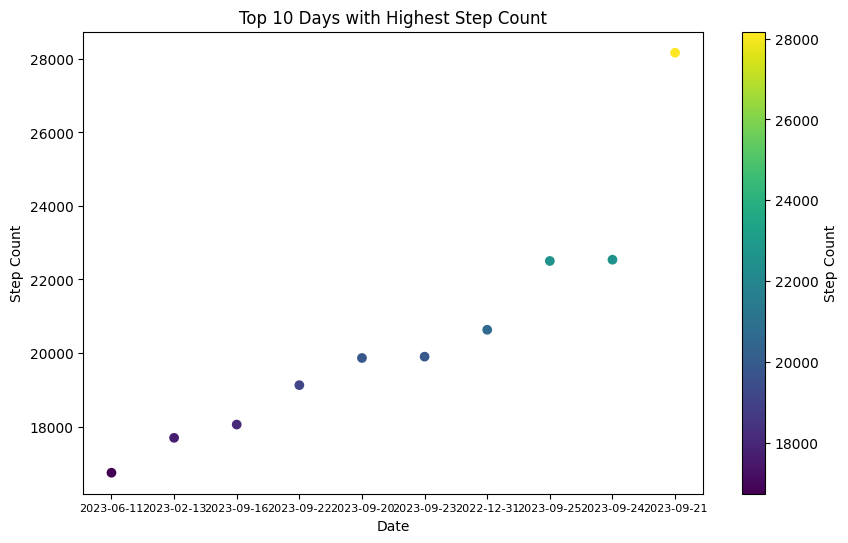

In [64]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

df_daily_step_count = pd.read_csv('stepcount_data.csv')
df_daily_step_count['startDate'] = pd.to_datetime(df_daily_step_count['startDate'])
# Sort the DataFrame by 'value' in descending order and get the top 10 rows
df_top10_days = df_daily_step_count.sort_values('value', ascending=False).head(10)
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Create a color gradient based on the 'value' column
colors = df_top10_days['value']
norm = mcolors.Normalize(vmin=colors.min(), vmax=colors.max())
plt.scatter(df_top10_days['startDate'].dt.strftime('%Y-%m-%d'), df_top10_days['value'], c=colors, cmap='viridis', norm=norm)
plt.colorbar(label='Step Count')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Top 10 Days with Highest Step Count')
plt.gca().invert_xaxis()  
plt.xticks(fontsize=8)
plt.show()


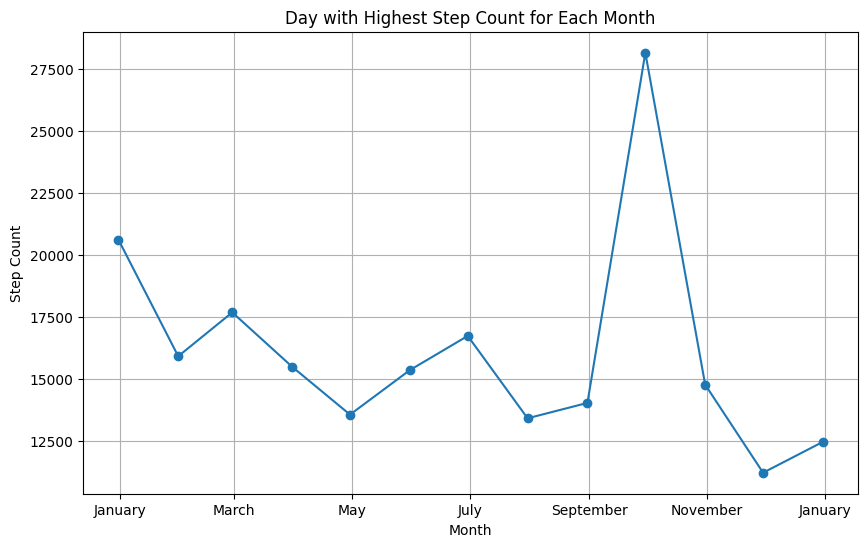

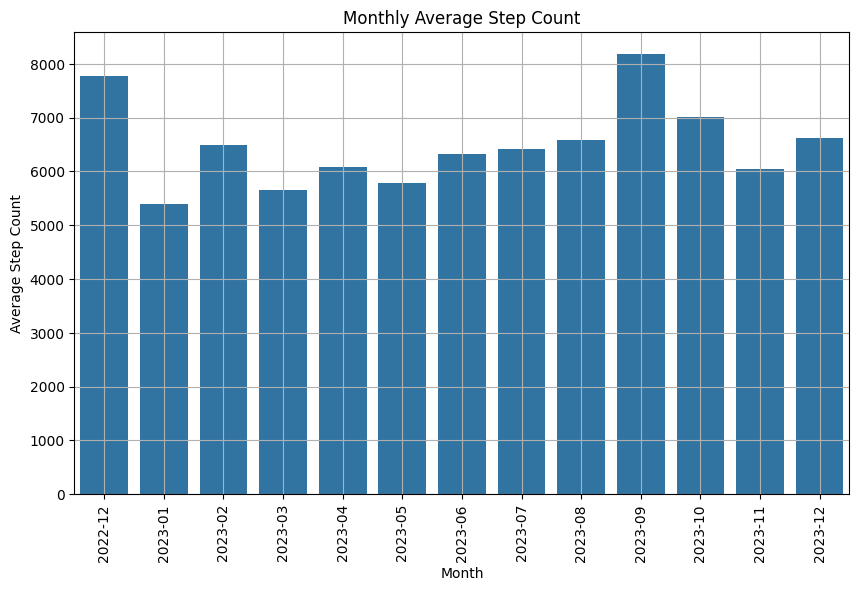

In [91]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_daily_step_count = pd.read_csv('stepcount_data.csv')
df_daily_step_count['startDate'] = pd.to_datetime(df_daily_step_count['startDate'])
df_daily_step_count.set_index('startDate', inplace=True)
df_monthly_max = df_daily_step_count.resample('M').max()
df_monthly_max.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_monthly_max['startDate'], df_monthly_max['value'], marker='o')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.xlabel('Month')
plt.ylabel('Step Count')
plt.title('Day with Highest Step Count for Each Month')
plt.grid(True)
plt.show()
df_daily_step_count['YearMonth'] = df_daily_step_count.index.to_period('M')
df_monthly_avg = df_daily_step_count.groupby('YearMonth').mean()
df_monthly_avg.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=df_monthly_avg['YearMonth'].astype(str), y=df_monthly_avg['value'])
plt.xlabel('Month')
plt.ylabel('Average Step Count')
plt.title('Monthly Average Step Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()




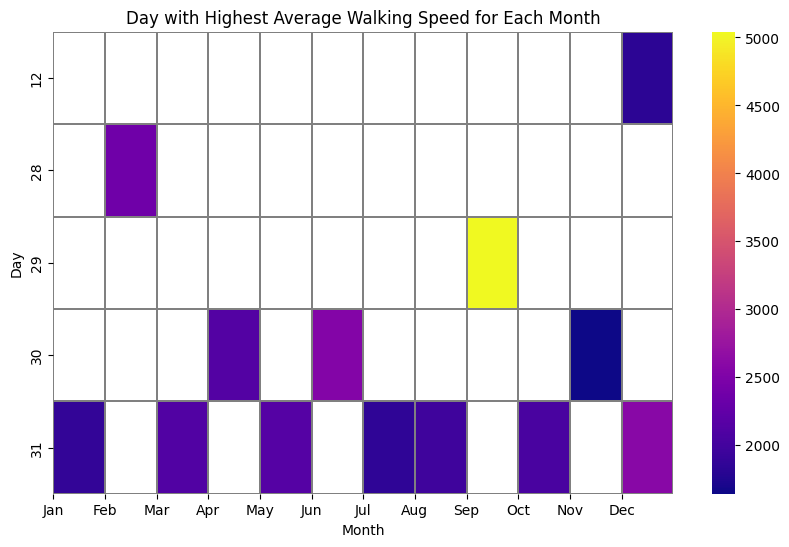

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

df_daily_avg_speed['year'] = df_daily_avg_speed['startDate'].dt.year
df_daily_avg_speed['month'] = df_daily_avg_speed['startDate'].dt.month
df_daily_avg_speed['day'] = df_daily_avg_speed['startDate'].dt.day
df_monthly_max = df_daily_avg_speed.groupby(['year', 'month']).max().reset_index()
df_pivot = df_monthly_max.pivot_table(values='value', index='day', columns='month')
# Create a heatmap calendar
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='plasma', linewidths=0.01, linecolor='grey')
plt.title('Day with Highest Average Walking Speed for Each Month')
plt.xlabel('Month')
plt.ylabel('Day')
plt.xticks(ticks=range(12), labels=[calendar.month_abbr[i] for i in range(1, 13)])
plt.show()


     startDate  totalEnergy
0   2023-03-07           32
1   2023-03-08         5121
2   2023-03-09         4762
3   2023-03-10         4449
4   2023-03-11         4156
..         ...          ...
276 2023-12-08         4149
277 2023-12-09         4299
278 2023-12-10         4734
279 2023-12-11         5144
280 2023-12-12         4882

[281 rows x 2 columns]


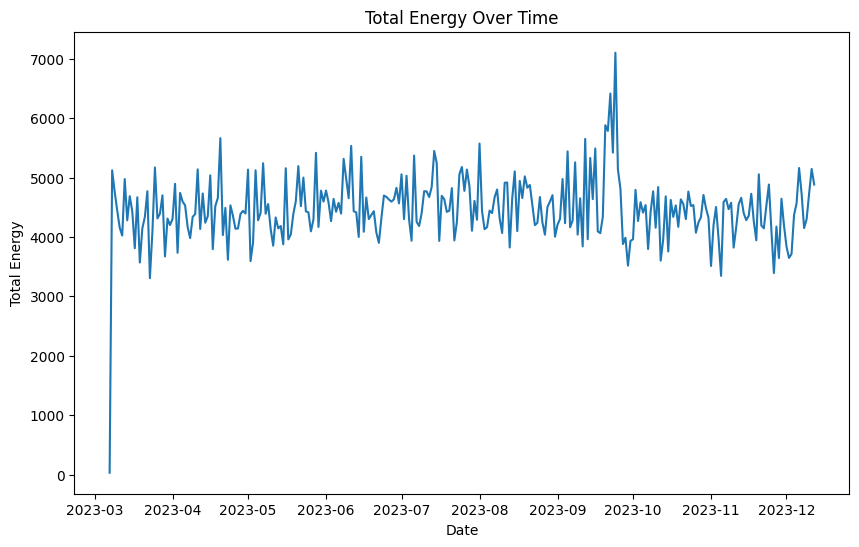

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the active energy data from the CSV file
df_active_energy = pd.read_csv('activeenergyburned_data.csv')

# Convert 'startDate' to datetime
df_active_energy['startDate'] = pd.to_datetime(df_active_energy['startDate'])

# Load the basal energy data from the CSV file
df_basal_energy = pd.read_csv('basalenergyburned_data.csv')

# Convert 'startDate' to datetime
df_basal_energy['startDate'] = pd.to_datetime(df_basal_energy['startDate'])

# Merge the two DataFrames on 'startDate'
df_total_energy = pd.merge(df_active_energy, df_basal_energy, on='startDate', how='outer')

# Fill NaN values with 0
df_total_energy.fillna(0, inplace=True)

# Create a new column for the total energy
df_total_energy['totalEnergy'] = df_total_energy['value_x'] + df_total_energy['value_y']

# Drop the 'value_x' and 'value_y' columns
df_total_energy.drop(['value_x', 'value_y'], axis=1, inplace=True)

# Convert 'totalEnergy' to integer to remove the fraction
df_total_energy['totalEnergy'] = df_total_energy['totalEnergy'].astype(int)

# Group by 'startDate' and calculate the sum of 'totalEnergy' for each day
df_total_energy = df_total_energy.groupby('startDate')['totalEnergy'].sum().reset_index()

# Display the DataFrame
print(df_total_energy)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_total_energy['startDate'], df_total_energy['totalEnergy'])
plt.xlabel('Date')
plt.ylabel('Total Energy')
plt.title('Total Energy Over Time')
plt.show()


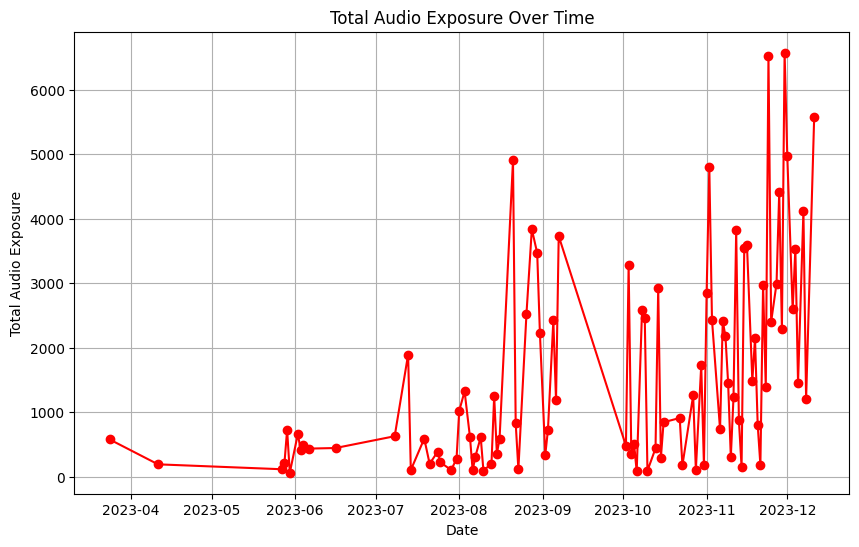

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the audio exposure data from the CSV file
df_audio_exposure = pd.read_csv('audioexposure_data.csv')

# Convert 'startDate' to datetime
df_audio_exposure['startDate'] = pd.to_datetime(df_audio_exposure['startDate'])
df_daily_audio_exposure = df_audio_exposure.groupby('startDate')['value'].sum().reset_index()
df_daily_audio_exposure['value'] = df_daily_audio_exposure['value'].astype(int)
plt.figure(figsize=(10, 6))
plt.plot(df_daily_audio_exposure['startDate'], df_daily_audio_exposure['value'], marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Total Audio Exposure')
plt.title('Total Audio Exposure Over Time')
plt.grid(True)
plt.show()


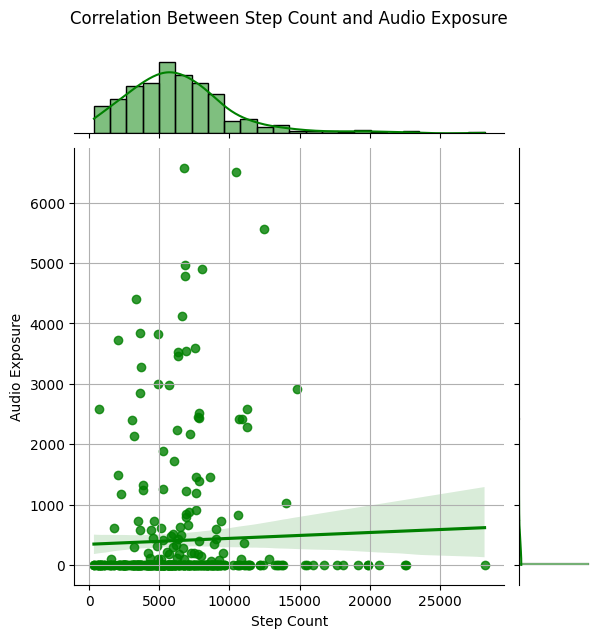

In [87]:
import seaborn as sns

df_merged = pd.merge(df_daily_step_count, df_daily_audio_exposure, on='startDate', how='outer')

# Fill NaN values with 0
df_merged.fillna(0, inplace=True)

# Create a jointplot
sns.jointplot(x='value_x', y='value_y', data=df_merged, kind='reg', color='g')

plt.xlabel('Step Count')
plt.ylabel('Audio Exposure')
plt.title('Correlation Between Step Count and Audio Exposure', pad=90)
plt.grid(True)
plt.show()


##

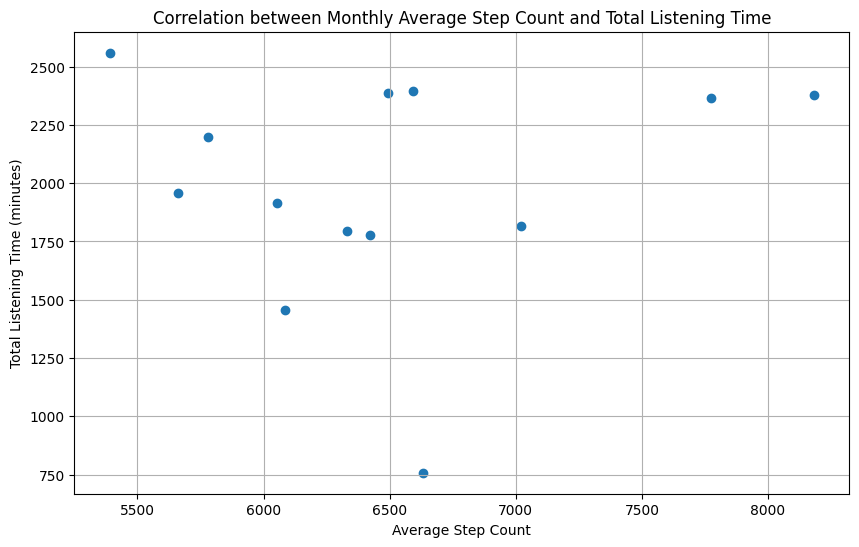

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
df_daily_total_listening_time['date'] = pd.to_datetime(df_daily_total_listening_time['date'])
df_daily_total_listening_time['month'] = df_daily_total_listening_time['date'].dt.to_period('M')
df_monthly_total_listening_time = df_daily_total_listening_time.groupby('month')['totalListeningTimeMin'].sum().reset_index()
df_daily_step_count['YearMonth'] = pd.to_datetime(df_daily_step_count['YearMonth'])
df_daily_step_count['month'] = df_daily_step_count['YearMonth'].dt.to_period('M')
df_monthly_avg = df_daily_step_count.groupby('month')['value'].mean()
df_monthly_avg = df_monthly_avg.reset_index()
df_merged = pd.merge(df_monthly_avg, df_monthly_total_listening_time, on='month')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['value'], df_merged['totalListeningTimeMin'])

plt.xlabel('Average Step Count')
plt.ylabel('Total Listening Time (minutes)')
plt.title('Correlation between Monthly Average Step Count and Total Listening Time')
plt.grid(True)
plt.show()


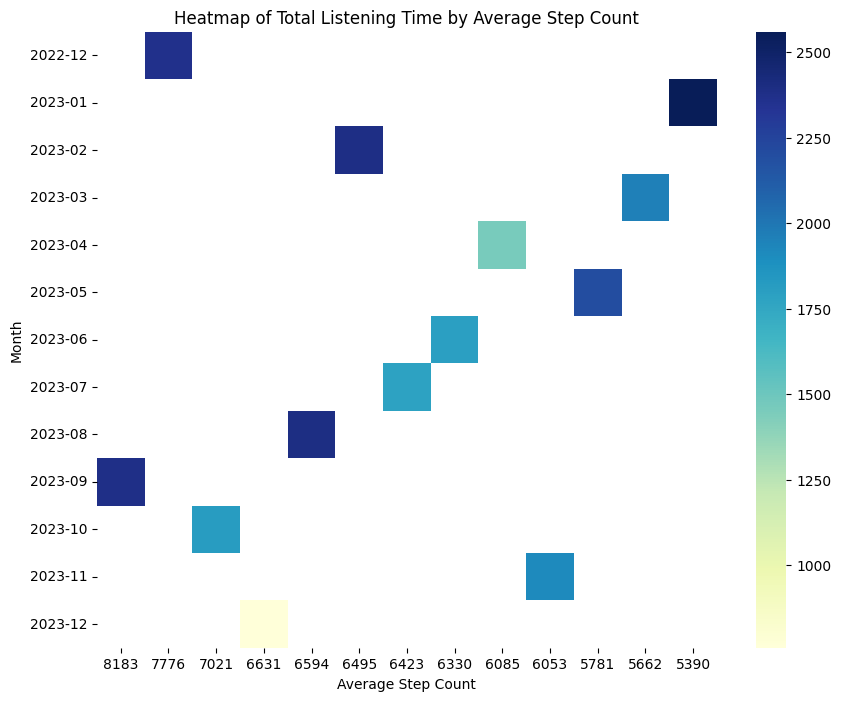

In [127]:
import seaborn as sns

# Round the 'value' column to the nearest whole number
df_merged['value'] = df_merged['value'].round(0).astype(int)

# Pivot the dataframe
df_pivot = df_merged.pivot(index='month', columns='value', values='totalListeningTimeMin')

# Order the columns (step count) in descending order
df_pivot = df_pivot[df_pivot.columns[::-1]]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot, cmap='YlGnBu')

plt.xlabel('Average Step Count')
plt.ylabel('Month')
plt.title('Heatmap of Total Listening Time by Average Step Count')
plt.show()


## Correlation of Monthly/daily StepCount values with Spotify Listening time (Monthly/daily)

In [143]:
df_daily_step_count = pd.read_csv(csv_file_path)
df_daily_step_count['startDate'] = pd.to_datetime(df_daily_step_count['startDate'])
df_daily_step_count.set_index('startDate', inplace=True)
start_date = pd.to_datetime("2022-12-12")
end_date = pd.to_datetime("2023-12-12")
df_daily_step_count = df_daily_step_count[(df_daily_step_count.index >= start_date) & (df_daily_step_count.index <= end_date)]




The correlation between daily step count and total listening time is: -0.044393249326632564


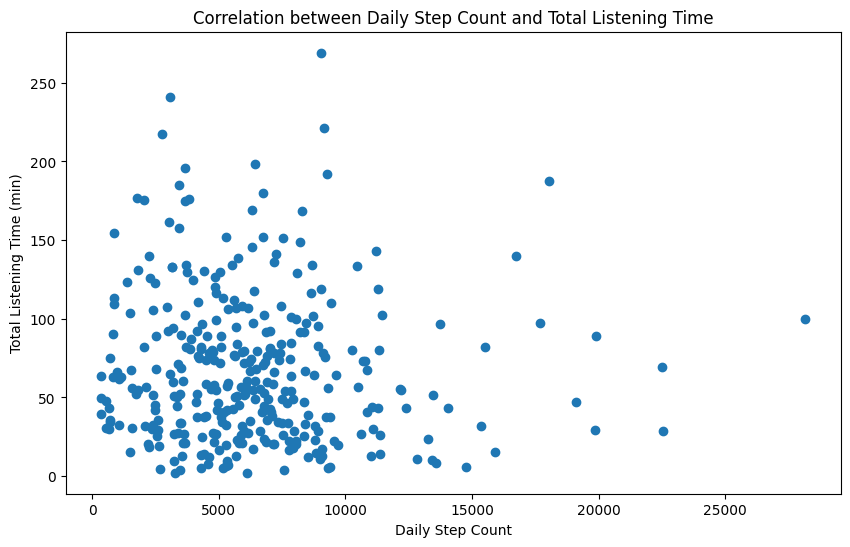

In [147]:
# Merge the two dataframes on the index (date)
df_merged = pd.merge(df_daily_step_count, df_daily_total_listening_time, left_index=True, right_index=True)

# Calculate the correlation
correlation = df_merged['value'].corr(df_merged['totalListeningTimeMin'])
print(f"The correlation between daily step count and total listening time is: {correlation}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_merged['value'], df_merged['totalListeningTimeMin'])
plt.title('Correlation between Daily Step Count and Total Listening Time')
plt.xlabel('Daily Step Count')
plt.ylabel('Total Listening Time (min)')
plt.show()


In [172]:
df_daily_total_step_count = df_daily_step_count.resample('D', on='startDate')['value'].sum().reset_index()
df_daily_artist = df_spotify_combined.resample('D')['artistName'].agg(lambda x: x.value_counts().idxmax() if not x.empty else None)
df_merged = pd.merge(df_daily_total_step_count, df_daily_artist, left_on='startDate', right_on=df_daily_artist.index)

# Calculate the correlation for each artist in top_artists
for artist in top_artists.index:
    # Create a binary column that indicates whether the artist of the day is the current artist
    df_merged[artist] = (df_merged['artistName'] == artist).astype(int)
    
    # Calculate the correlation
    correlation = df_merged['value'].corr(df_merged[artist])
    print(f"The correlation between daily step count and the frequency of listening to {artist} is: {correlation}")


The correlation between daily step count and the frequency of listening to Metro Boomin is: 0.05397752661963041
The correlation between daily step count and the frequency of listening to UZI is: -0.09293257187981704
The correlation between daily step count and the frequency of listening to The Weeknd is: 0.015403676126310448
The correlation between daily step count and the frequency of listening to Travis Scott is: 0.11431011016119078
The correlation between daily step count and the frequency of listening to Motive is: -0.05815561818622814
The correlation between daily step count and the frequency of listening to Drake is: -0.0425070834569984
The correlation between daily step count and the frequency of listening to Heijan is: -0.04952470731671739
The correlation between daily step count and the frequency of listening to Future is: -0.0592652084909215
The correlation between daily step count and the frequency of listening to Eminem is: 0.01722210436720053
The correlation between daily 

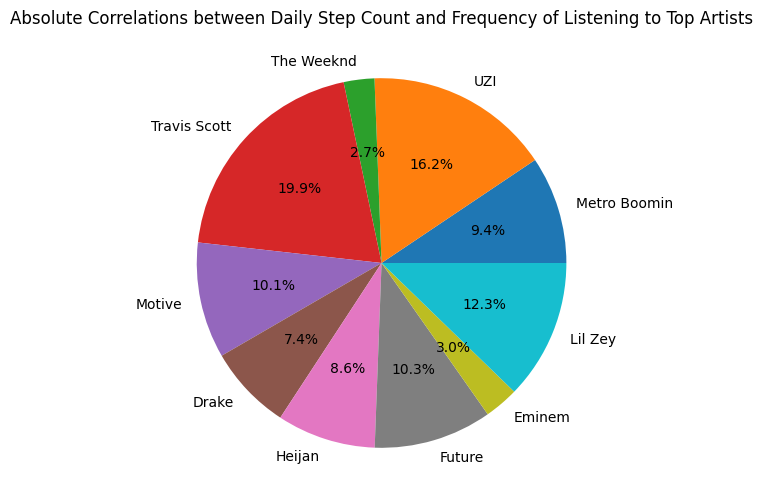

In [174]:
# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(abs(correlations_series.values), labels=correlations_series.index, autopct='%1.1f%%')
plt.title('Absolute Correlations between Daily Step Count and Frequency of Listening to Top Artists')
plt.show()


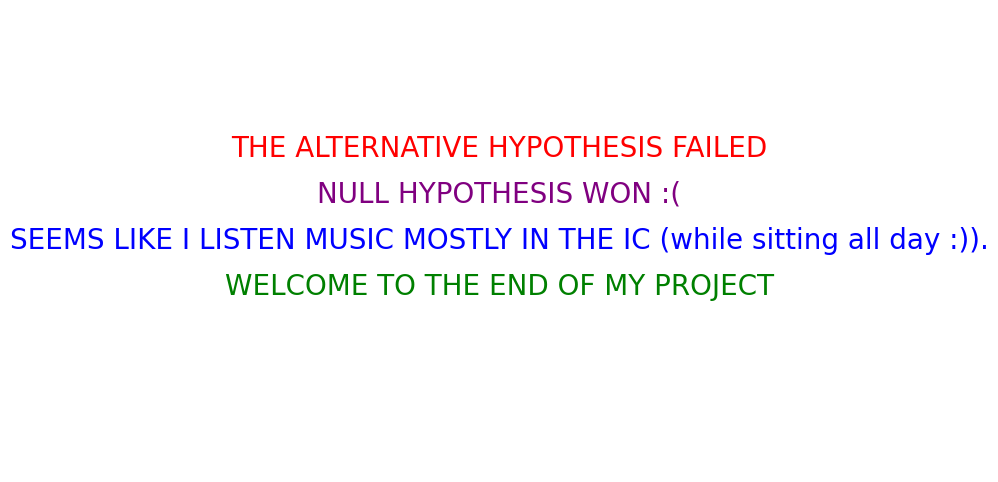

In [11]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(10, 6)

# Hide the axes
ax.axis('off')

# Add the text
plt.text(0.5, 0.7, "THE ALTERNATIVE HYPOTHESIS FAILED", ha='center', va='center', color='red', fontsize=20)
plt.text(0.5, 0.6, "NULL HYPOTHESIS WON :(", ha='center', va='center', color='purple', fontsize=20)
plt.text(0.5, 0.5, "SEEMS LIKE I LISTEN MUSIC MOSTLY IN THE IC (while sitting all day :)).", ha='center', va='center', color='blue', fontsize=20)
plt.text(0.5, 0.4, "WELCOME TO THE END OF MY PROJECT", ha='center', va='center', color='green', fontsize=20)

# Display the plot
plt.show()

